### Just a tweak to use sublime shortcuts

In [1]:
%%javascript
require(["codemirror/keymap/sublime", "notebook/js/cell", "base/js/namespace"],
    function(sublime_keymap, cell, IPython) {
        cell.Cell.options_default.cm_config.keyMap = 'sublime';
        var cells = IPython.notebook.get_cells();
        for(var cl=0; cl< cells.length ; cl++){
            cells[cl].code_mirror.setOption('keyMap', 'sublime');
        }
    }
);

<IPython.core.display.Javascript object>

In [2]:
# Install tensorflow provided datasets - uncomment on the first run
# !pip install -U tensorflow_datasets

In [3]:
# Necessary imports
import tensorflow as tf

# Import TensorFlow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

# Logging
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

### Fashion MNIST dataset

The Fashion MNIST dataset comes as a dictionary, with an already performed train and test dataset split. Metadata provide information about the dataset.

In [4]:
# Load dataset and metadata
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

### ModelBuilder class test

In [5]:
# ModelBuilder import
from local import builder as bl

In [6]:
# Train attempt with default parameters
builder = bl.ModelBuilder(dataset=dataset, metadata=metadata)
model = builder.define()
builder.model = model
history = builder.train()
builder.history = history

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.6395 - accuracy: 0.7802
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3917 - accuracy: 0.8618
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3423 - accuracy: 0.8747
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3235 - accuracy: 0.8818
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2927 - accuracy: 0.8913


In [7]:
# Model summary
builder.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Model test
evaluation = builder.evaluate()

313/313 [==============================] - 1s 2ms/step - loss: 0.3475 - accuracy: 0.8724


### Two extra hidden layers, all with the same number of neurons

In [9]:
# Empty builder definition
builder = bl.ModelBuilder()

# Modifying default parameters and building model
num_hidden_layers = 3
hidden_layer_neurons = num_hidden_layers*[builder.hidden_layer_neurons]
hidden_layer_activation = num_hidden_layers*[builder.hidden_layer_activation]

builder = bl.ModelBuilder(dataset=dataset, 
                          metadata=metadata, 
                          num_hidden_layers= num_hidden_layers,
                          hidden_layer_neurons = hidden_layer_neurons,
                          hidden_layer_activation = hidden_layer_activation)
model = builder.define()
builder.model = model
builder.model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = builder.train()
builder.history = history

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6517 - accuracy: 0.7671
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3813 - accuracy: 0.8611
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3394 - accuracy: 0.8751
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3136 - accuracy: 0.8849
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2917 - accuracy: 0.8912


In [11]:
evaluation = builder.evaluate()

313/313 [==============================] - 1s 3ms/step - loss: 0.3624 - accuracy: 0.8723


### Two extra hidden layers, with different number of neurons

In [20]:
# Empty builder definition
builder = bl.ModelBuilder()

# Modifying default parameters and building model
num_hidden_layers = 3
hidden_layer_neurons = [128,64,32]
hidden_layer_activation = num_hidden_layers*[builder.hidden_layer_activation]

builder = bl.ModelBuilder(dataset=dataset, 
                          metadata=metadata, 
                          num_hidden_layers= num_hidden_layers,
                          hidden_layer_neurons = hidden_layer_neurons,
                          hidden_layer_activation = hidden_layer_activation)
model = builder.define()
builder.model = model
builder.model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_20 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_21 (Dense)             (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = builder.train()
builder.history = history

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6696 - accuracy: 0.7640
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3795 - accuracy: 0.8631
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3443 - accuracy: 0.8730
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3159 - accuracy: 0.8835
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2972 - accuracy: 0.8883


In [14]:
evaluation = builder.evaluate()

313/313 [==============================] - 1s 2ms/step - loss: 0.3755 - accuracy: 0.8636


In [15]:
history.history['accuracy']

[0.8217833042144775,
 0.8656166791915894,
 0.8744333386421204,
 0.8838666677474976,
 0.889033317565918]

### Model comparison

Train and test of different models for comparison purposes. 
<ul>
    <li> Test1: changing hidden layers number
    <li> Test2: changing hidden layer neurons
</ul>

In [33]:
# Test1
epochs = 20
layer_numbers = [1,3,10,20,50]
hidden_layer_neurons_common = 10
t1_history = []

# Empty builder definition
builder = bl.ModelBuilder()
hidden_layer_activation_common = builder.hidden_layer_activation

# Modifying default parameters and building model
for num_hidden_layers in layer_numbers:
    print(f'Number of hidden layers: {num_hidden_layers}')
    hidden_layer_neurons = num_hidden_layers*[hidden_layer_neurons_common]
    hidden_layer_activation = num_hidden_layers*[hidden_layer_activation_common]
    builder = bl.ModelBuilder(dataset=dataset, 
                              metadata=metadata, 
                              num_hidden_layers= num_hidden_layers,
                              hidden_layer_neurons = hidden_layer_neurons,
                              hidden_layer_activation = hidden_layer_activation,
                              epochs = epochs)
    model = builder.define()
    builder.model = model
    history = builder.train()
    t1_history.append(history.history['accuracy'])

Number of hidden layers: 1
Epoch 1/20
1875/1875 [==============================] - 4s 1ms/step - loss: 0.8667 - accuracy: 0.6978
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4624 - accuracy: 0.8376
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4245 - accuracy: 0.8519
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4026 - accuracy: 0.8588
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3904 - accuracy: 0.8636
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3825 - accuracy: 0.8660
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3813 - accuracy: 0.8660
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3727 - accuracy: 0.8700
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3711 - accuracy: 0.8676
Epoch 10/20
1875/1875 [==============================] 

1875/1875 [==============================] - 3s 2ms/step - loss: 0.5587 - accuracy: 0.8012
Epoch 20/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5600 - accuracy: 0.7994
Number of hidden layers: 50
Epoch 1/20
1875/1875 [==============================] - 7s 2ms/step - loss: 2.3026 - accuracy: 0.0994
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0983
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.1001
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.1010
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.0986
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.0988
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.0991
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/s

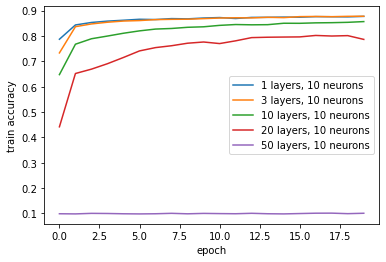

In [38]:
for i in range(len(t1_history)):
    plt.plot(t1_history[i],label=f'{layer_numbers[i]} layers, 10 neurons')

plt.legend()
plt.xlabel('epoch')
plt.ylabel('train accuracy')
plt.show()   

In [40]:
# Test2
epochs = 20
num_hidden_layers = 10
hidden_layer_neurons = [10,20,50,100]
t2_history = []

# Empty builder definition
builder = bl.ModelBuilder()
hidden_layer_activation_common = builder.hidden_layer_activation

# Modifying default parameters and building model
for num_neurons in hidden_layer_neurons:
    print(f'Number of neurons: {num_neurons}')
    hidden_layer_neurons = num_hidden_layers*[num_neurons]
    hidden_layer_activation = num_hidden_layers*[hidden_layer_activation_common]
    builder = bl.ModelBuilder(dataset=dataset, 
                              metadata=metadata, 
                              num_hidden_layers= num_hidden_layers,
                              hidden_layer_neurons = hidden_layer_neurons,
                              hidden_layer_activation = hidden_layer_activation,
                              epochs = epochs)
    model = builder.define()
    builder.model = model
    history = builder.train()
    t2_history.append(history.history['accuracy'])

Number of neurons: 10
Epoch 1/20
1875/1875 [==============================] - 4s 1ms/step - loss: 1.4991 - accuracy: 0.3726
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7280 - accuracy: 0.7100
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5904 - accuracy: 0.7820
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5362 - accuracy: 0.7999
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4984 - accuracy: 0.8121
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4760 - accuracy: 0.8195
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4771 - accuracy: 0.8211
Epoch 8/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4605 - accuracy: 0.8252
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4565 - accuracy: 0.8302
Epoch 10/20
1875/1875 [==============================] - 3s 

Epoch 20/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2288 - accuracy: 0.9158
Number of neurons: 1000
Epoch 1/20
 156/1875 [=>............................] - ETA: 3:31 - loss: 1.7151 - accuracy: 0.2801

KeyboardInterrupt: 

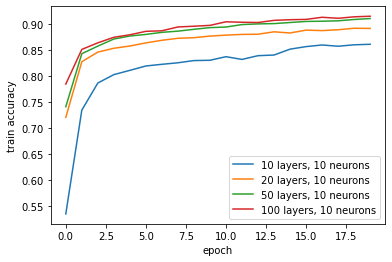

In [43]:
for i in range(len(t2_history)):
    plt.plot(t2_history[i],label=f'{hidden_layer_neurons[i]} layers, 10 neurons')

plt.legend()
plt.xlabel('epoch')
plt.ylabel('train accuracy')
plt.show()  